Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "Myza Alexander"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [2]:
def deriv(f, x, h):
    U = f(x)
    A = f(x + h)
    B = f(x + h * 2)
    DR = ((- 3 * U) + (4 * A - B)) / (h*2)
    return DR

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


При приблежении h к 0 погрешность вычисления тоже стремится к 0. А порядок апроксимации как и требовалось O(h^2)

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [4]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def two_step_deriv(x, h):#tablo1
    P = f(x + h)
    M = f(x - h)
    fder = (P - M) / (h * 2)
    return fder

In [6]:
def three_step_deriv(x, h):#tablo2
    U = f(x)
    A = f(x + h)
    B = f(x + h * 2)
    fder = ((- 3 * U) + (4 * A - B)) / (h*2)
    return fder 

In [7]:
x = 1

print('Результаты вычислений')
print('two-step scheme'.center(15, ' '), 'three-step scheme'.center(15, ' '), sep=' | ')
for h in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    derivtwostep = two_step_deriv(x, h)
    derivthreestep = three_step_deriv(x, h)
    
    print("%.e -- %7.5g" % (h, derivtwostep), "%.e -- %7.5g" % (h, derivthreestep), sep=' | ')

Результаты вычислений
two-step scheme | three-step scheme
1e-01 --  1.0033 | 1e-01 -- 0.99379
1e-02 --       1 | 1e-02 -- 0.99993
1e-03 --       1 | 1e-03 --       1
1e-04 --       1 | 1e-04 --       1
1e-05 --       1 | 1e-05 --       1
1e-06 --       1 | 1e-06 --       1
1e-07 --       1 | 1e-07 --       1
1e-08 --       1 | 1e-08 --       1


In [8]:

print('ошибки  вычислений')
print('two-step scheme'.center(15, ' '), 'three-step scheme'.center(15, ' '), sep=' | ')
for h in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
    derivtwostep = two_step_deriv(x, h)
    derivthreestep = three_step_deriv(x, h)
    
    print("%.e -- %.2e" % (h, derivtwostep - fder(1)), "%.e -- %.2e" % (h, derivthreestep - fder(1)), sep=' | ')

ошибки  вычислений
two-step scheme | three-step scheme
1e-01 -- 3.34e-03 | 1e-01 -- -6.21e-03
1e-02 -- 3.33e-05 | 1e-02 -- -6.62e-05
1e-03 -- 3.33e-07 | 1e-03 -- -6.66e-07
1e-04 -- 3.33e-09 | 1e-04 -- -6.67e-09
1e-05 -- 3.43e-11 | 1e-05 -- -4.90e-11
1e-06 -- -2.64e-11 | 1e-06 -- -1.94e-10
1e-07 -- 2.88e-11 | 1e-07 -- 1.69e-09
1e-08 -- -5.26e-10 | 1e-08 -- -1.72e-08


### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [9]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


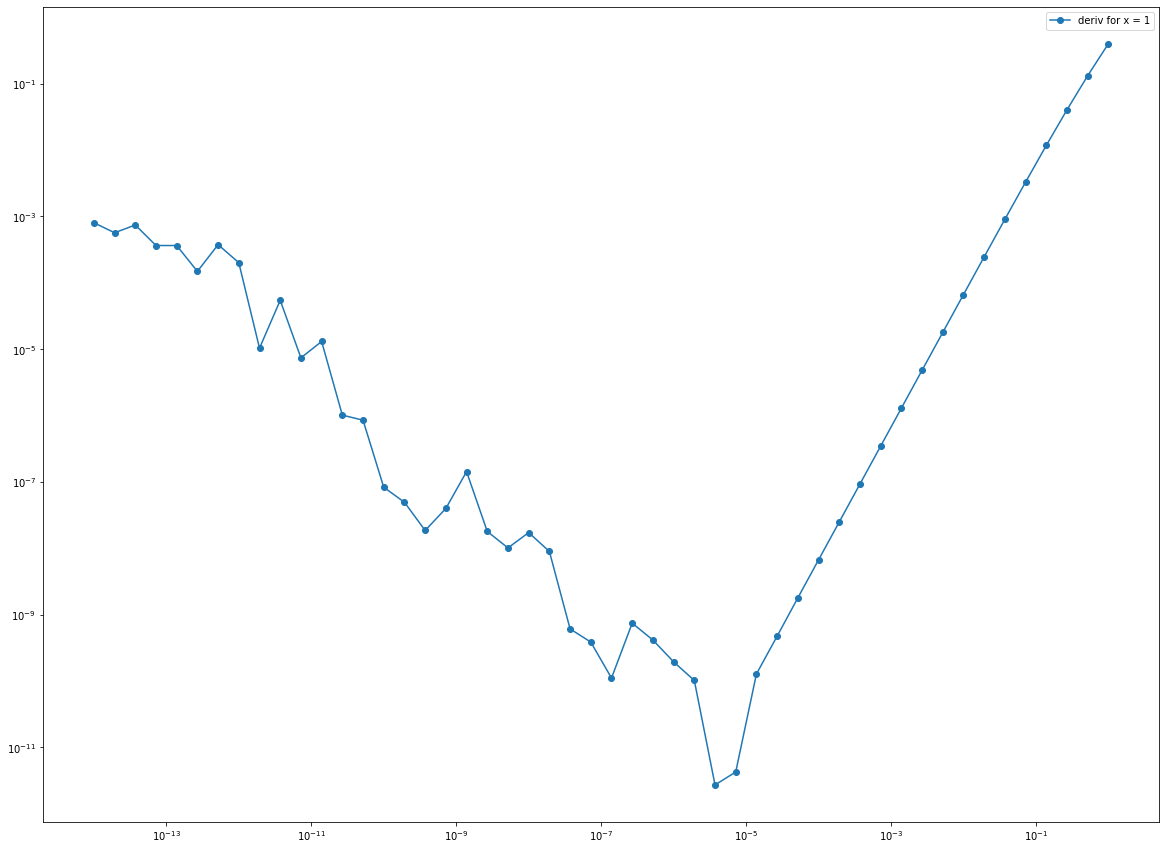

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = 1
h_arr = np.logspace(-14, 0, num=50)
df_forward_arr = np.array([])

for h in h_arr:
    df_forward_arr = np.append(df_forward_arr, np.abs(deriv(f, x, h) - fder(x)))

plt.figure(figsize=(20, 15))
plt.loglog(h_arr, df_forward_arr, 'o-', label=f'deriv for x = {x}')
plt.legend()

При зависимости ошибки от шагамы можем наблюдать линейный спад близ нуля в остальных случаях порядок 10^-6.
В случае если мы будем брать слишком малое h то мы будем получать ошибку за счет печального округления, которое вылезает из первого слагаемого, который будет доминировать над 2 слагаемым
При малом h мы будем получать ошибку за счет печального приближения, которое вылезает из второго слагаемого, который будет доминировать над 1 слагаемым

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [11]:
import matplotlib.pyplot as plt
def midpoint_rule(func, a, b, eps):
    c = 1
    ON = func((a + b) / 2) * (b - a)
    O2N = (func((a + (a + b) / 2) / 2) + func(((a + b) / 2 + b) / 2)) * (b - a) / 2
    while abs(O2N - ON) >= eps:
        c += 1
        h = (b - a) / c
        i = np.arange(1, c + 1)
        ON = (func((i - 0.5) * h) * h).sum()
        h = (b - a) / (2 * c)
        i = np.arange(1, 2 * c + 1)
        O2N = (func((i - 0.5) * h) * h).sum()

    int_l = ON 
    return int_l, c

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


ответ интегрирования  0.2421875, кол-во интервалов: 4



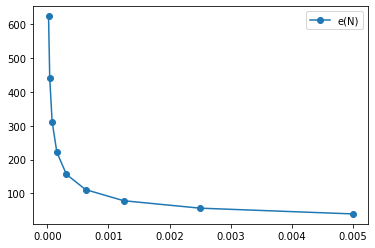

In [12]:
f = lambda x: x ** 3
k = 2
res, c = midpoint_rule(f, 0, 1, 10 ** (-k))
print(f'ответ интегрирования  {res}, кол-во интервалов: {c}')
print()

eps_list = []
N_list = []
for k in range(1, 10):
  eps = 0.01 / 2 ** k
  res, c = midpoint_rule(f, 0, 3, eps)

  eps_list.append(eps)
  N_list.append(c)

plt.plot(eps_list, N_list, '-o', label=r'e(N)')
plt.legend()

Решение интеграла ручками от x^3 на (0, 2) = 0.25, с помощью функции 0.2421875, а это почти подходит под интервал заданной ошибки (0.243, 0.256)
Скорость сходимости ожидаемо: O(1/N^2)

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [13]:
import numpy as np

a = 0
b = 1
eps = 1e-4
f_t = lambda t: 2 * np.sin(t) / t
res, c = midpoint_rule(f_t, a, b, eps)
print(f'результат прямого вычисления: {res}, кол-во интервалов: {c}')
f = lambda x: 2 + np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x)
res, c = midpoint_rule(f, a, b, eps)
print(f'результат вычисления с вычитаниями сингулярности: {res},кол-во интервалов: {c}')

результат прямого вычисления: 1.8922941998480554, кол-во интервалов: 14
результат вычисления с вычитаниями сингулярности: 1.8920193180026728,кол-во интервалов: 16


In [14]:
Вычисления определеннного интеграла через вычитания сингуляроности затребовали больше интервалов,
чтобы достичь определённой точности, следовательно для этого также потребовалось больше шагов.

SyntaxError: invalid syntax (3478698500.py, line 1)

# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

Пусть функции данных интегралов (интеграл равный пи) называется J(x), функция интеграла (интеграл равный пи/2) называется M(x))
функция искомого интеграла называется Z(x))
Для подинтегральной функции исть важные точки в x=0, x=1 и чтобы невилировать сингулярности в этих точках, сделаем линейную комбинацию lambda функций J,Z,M  и в пределе функций lambda(x) при x стремящемся к особым точкам является константами не уходящими в бесконечность.
по итогу раскладываем функцию (а можно принять за 1, это не сделает погоды)lambda(x)=a*Z(x)+b*J(x)+c*M(x) 

Пределы в сингулярных точках можно записать как предел к важным точкам от функции Z(x)(только в числителе кроме экспоненты с переменной в степени будет ещё "+b+cx", а числитель один на всех)
Раздожение экспоненты в ряд Тейлора около важных точек даст нам (в нуле 1+x+O(x^2) в единице exp+exp(x-1)+O((x-1)^2) что при 
подстановке в пределы даст нам систему из уравнений:((1):0=1+b (2):exp+b+c=0 )из этого имеем что b=-1 с=1-exp
по итогу лямда выглядит так:lambda(x)=(exp(x)-1+x+x*exp)/(sqrt(x-x^2))

Такая функция ограничена и интегрируема на интервале (0;1) так как пределы к особым точкам от функции лямда равны 0
Значит исходный интеграл можно поделить на куски. Так мы для получения требуемого интеграла сделаем так ((INEGRAL(0;1))lambda(x)-b*J(x)+c*M(x)) что при разбиении на интегралы даёт результат: ((INEGRAL(0;1)lambda(x))+пи/2+пи*exp/2 

Функция lambda не определена в важных точках, но это невилируется пределами с разных сторон.

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [15]:
from math import sqrt, pi, e

def integ(kol=10):
    def f(x):
      if x == 1 or x == 0:
        return 0
      return  (e ** x - 1 + (1 - e) * x) / (sqrt(x * (1 - x)))
    n = kol - 1
    h = (1 - 0) / n
    ne_x2_I= sum([f(i * h) for i in range(1, n)])
    ne_I = h * ((f(0) + f(1)) / 2 + ne_x2_I)
    return ne_I + pi * (1 + e) / 2

In [16]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
